In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score,silhouette_samples
import matplotlib.cm as cm

In [2]:
df=pd.read_csv('dow_jones_index.data',sep=',')

In [3]:
print(df.head())

   quarter stock       date    open    high     low   close     volume  \
0        1    AA   1/7/2011  $15.82  $16.72  $15.78  $16.42  239655616   
1        1    AA  1/14/2011  $16.71  $16.71  $15.64  $15.97  242963398   
2        1    AA  1/21/2011  $16.19  $16.38  $15.60  $15.79  138428495   
3        1    AA  1/28/2011  $15.87  $16.63  $15.82  $16.13  151379173   
4        1    AA   2/4/2011  $16.18  $17.39  $16.18  $17.14  154387761   

   percent_change_price  percent_change_volume_over_last_wk  \
0               3.79267                                 NaN   
1              -4.42849                            1.380223   
2              -2.47066                          -43.024959   
3               1.63831                            9.355500   
4               5.93325                            1.987452   

   previous_weeks_volume next_weeks_open next_weeks_close  \
0                    NaN          $16.71           $15.97   
1            239655616.0          $16.19           $15

## MISSING VALUES

In [4]:
for i in df.columns:
    print(f"{i}:{df[i].isnull().sum()}")

quarter:0
stock:0
date:0
open:0
high:0
low:0
close:0
volume:0
percent_change_price:0
percent_change_volume_over_last_wk:30
previous_weeks_volume:30
next_weeks_open:0
next_weeks_close:0
percent_change_next_weeks_price:0
days_to_next_dividend:0
percent_return_next_dividend:0


In [5]:
## TRACK THE FEATURES WHICH HAS NAN VALUES:

In [6]:
features_nan=[features for features in df.columns if(df[features].isnull().sum()>0)]

In [7]:
features_nan

['percent_change_volume_over_last_wk', 'previous_weeks_volume']

# lets see the distribution 

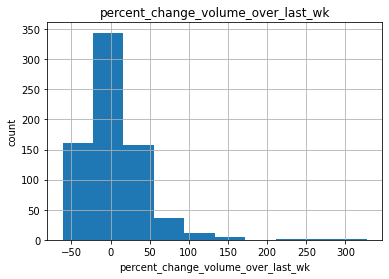

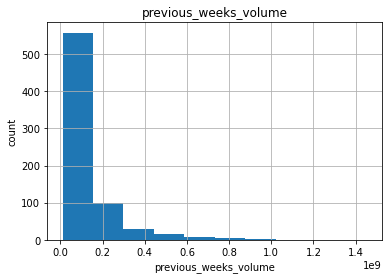

In [8]:
for features in features_nan:
    df[features].hist()
    plt.xlabel(features)
    plt.ylabel("count")
    plt.title(features)
    plt.show()
    

## NUMERICAL VARIABLES

In [9]:
numerical_features=[features for features in df.columns if(df[features].dtypes!='O')]

In [10]:
numerical_features

['quarter',
 'volume',
 'percent_change_price',
 'percent_change_volume_over_last_wk',
 'previous_weeks_volume',
 'percent_change_next_weeks_price',
 'days_to_next_dividend',
 'percent_return_next_dividend']

In [11]:
print("Number of numerical variables:",len(numerical_features))

Number of numerical variables: 8


In [12]:
df[numerical_features].head()

,quarter,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend
0,1,239655616,3.79267,NaN,NaN,-4.428490,26,0.182704
1,1,242963398,-4.42849,1.380223,239655616.0,-2.470660,19,0.187852
2,1,138428495,-2.47066,-43.024959,242963398.0,1.638310,12,0.189994
3,1,151379173,1.63831,9.355500,138428495.0,5.933250,5,0.185989
4,1,154387761,5.93325,1.987452,151379173.0,0.230814,97,0.175029


In [13]:
## DISCRETE FEATURES:

In [14]:
discrete_features=[features for features in numerical_features if(len(df[features].unique())<25)]

In [15]:
discrete_features

['quarter']

# lets see the distribution

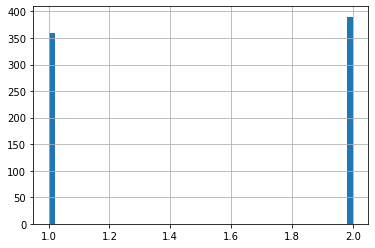

In [16]:
df['quarter'].hist(bins=50)

## CONTINUOUS VARIABLES 

In [17]:
continuous_variables=[features for features in numerical_features if features not in discrete_features]

In [18]:
continuous_variables

['volume',
 'percent_change_price',
 'percent_change_volume_over_last_wk',
 'previous_weeks_volume',
 'percent_change_next_weeks_price',
 'days_to_next_dividend',
 'percent_return_next_dividend']

In [19]:
# lets see the distrubution of continuous features 

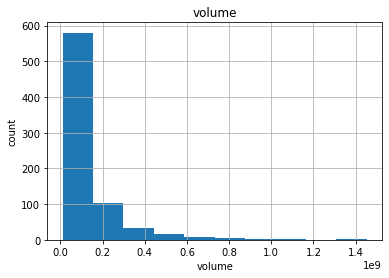

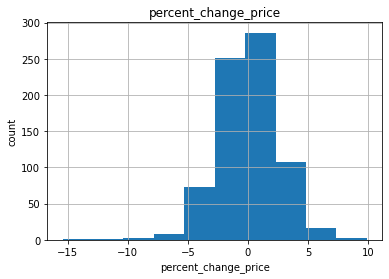

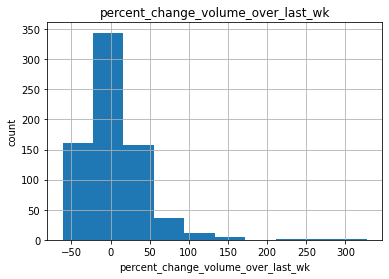

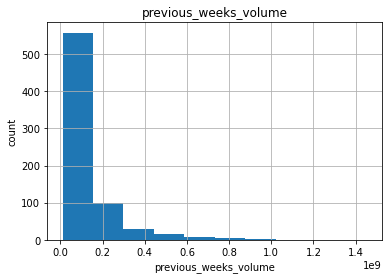

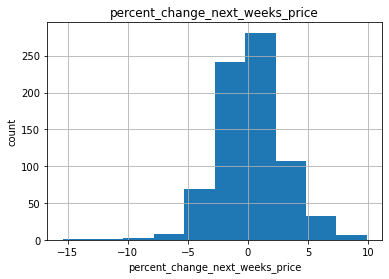

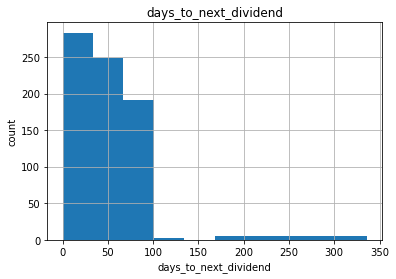

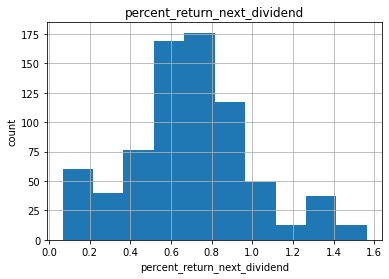

In [20]:
for features in continuous_variables:
    df[features].hist()
    plt.xlabel(features)
    plt.ylabel("count")
    plt.title(features)
    plt.show()

## OUTLIERS

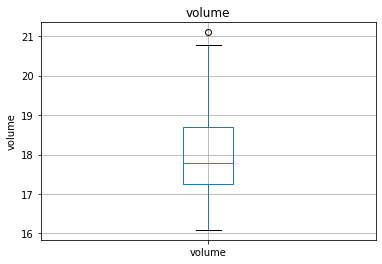

c:\users\hp\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


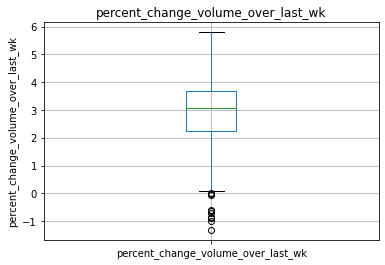

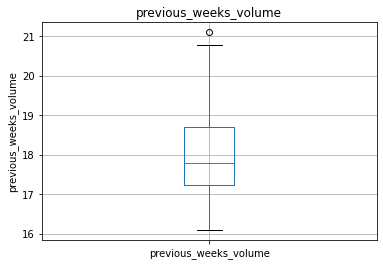

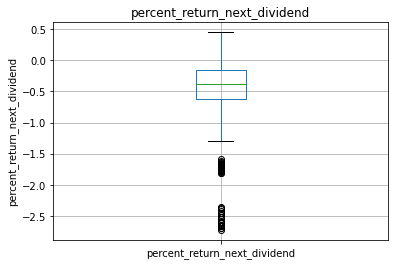

In [21]:
for feature in continuous_variables:
    data=df.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

## CATEGORICAL VARIABLES

In [22]:
catagorical_features=[features for features in df.columns if(df[features].dtypes=='O')]

In [23]:
catagorical_features

['stock',
 'date',
 'open',
 'high',
 'low',
 'close',
 'next_weeks_open',
 'next_weeks_close']

## CARDINALITY of categorical features

In [24]:
for features in catagorical_features:
    print(f"{features} has {len(df[features].unique())} unique values")

stock has 30 unique values
date has 25 unique values
open has 722 unique values
high has 713 unique values
low has 711 unique values
close has 711 unique values
next_weeks_open has 720 unique values
next_weeks_close has 715 unique values


In [25]:
df.shape

(750, 16)

## FEATURE ENGINEERING

In [26]:
## HANDLING THE MISSING VALUES

In [27]:
features_nan

['percent_change_volume_over_last_wk', 'previous_weeks_volume']

In [28]:
## percent_change_volume_over_last_wk'

In [29]:
df['percent_change_volume_over_last_wk_Nan']=np.where(df['percent_change_volume_over_last_wk'].isnull(),1,0)

In [30]:
df['percent_change_volume_over_last_wk'].fillna(df['percent_change_volume_over_last_wk'].median(),inplace=True)

In [31]:
# previous_weeks_volume

In [32]:
df['previous_weeks_volume_nan']=np.where(df['previous_weeks_volume'].isnull(),1,0)

In [33]:
df['previous_weeks_volume'].fillna(df['previous_weeks_volume'].median(),inplace=True)

In [34]:
df[features_nan].isnull().sum()

percent_change_volume_over_last_wk    0
previous_weeks_volume                 0
dtype: int64

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 18 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   quarter                                 750 non-null    int64  
 1   stock                                   750 non-null    object 
 2   date                                    750 non-null    object 
 3   open                                    750 non-null    object 
 4   high                                    750 non-null    object 
 5   low                                     750 non-null    object 
 6   close                                   750 non-null    object 
 7   volume                                  750 non-null    int64  
 8   percent_change_price                    750 non-null    float64
 9   percent_change_volume_over_last_wk      750 non-null    float64
 10  previous_weeks_volume                   750 non-null    float6

In [36]:
df.head()

,quarter,stock,date,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend,percent_change_volume_over_last_wk_Nan,previous_weeks_volume_nan
0,1,AA,1/7/2011,$15.82,$16.72,$15.78,$16.42,239655616,3.79267,0.512586,52945558.0,$16.71,$15.97,-4.428490,26,0.182704,1,1
1,1,AA,1/14/2011,$16.71,$16.71,$15.64,$15.97,242963398,-4.42849,1.380223,239655616.0,$16.19,$15.79,-2.470660,19,0.187852,0,0
2,1,AA,1/21/2011,$16.19,$16.38,$15.60,$15.79,138428495,-2.47066,-43.024959,242963398.0,$15.87,$16.13,1.638310,12,0.189994,0,0
3,1,AA,1/28/2011,$15.87,$16.63,$15.82,$16.13,151379173,1.63831,9.355500,138428495.0,$16.18,$17.14,5.933250,5,0.185989,0,0
4,1,AA,2/4/2011,$16.18,$17.39,$16.18,$17.14,154387761,5.93325,1.987452,151379173.0,$17.33,$17.37,0.230814,97,0.175029,0,0


## encoding techniques

In [37]:
## HANDLING RARE CATEGORY

In [38]:
catagorical_features

['stock',
 'date',
 'open',
 'high',
 'low',
 'close',
 'next_weeks_open',
 'next_weeks_close']

In [39]:
## 'stock'

In [40]:
len(df['stock'].unique())

30

In [41]:
d=dict(df['stock'].value_counts())

In [42]:
df['stock'].replace(d,inplace=True)

In [43]:
df['stock']

0      25
1      25
2      25
3      25
4      25
       ..
745    25
746    25
747    25
748    25
749    25
Name: stock, Length: 750, dtype: int64

In [44]:
##  'date'

In [45]:
len(df['date'].unique())

25

In [46]:
d=dict(df['date'].value_counts())

In [47]:
df['date'].replace(d,inplace=True)

In [48]:
df['date']

0      30
1      30
2      30
3      30
4      30
       ..
745    30
746    30
747    30
748    30
749    30
Name: date, Length: 750, dtype: int64

In [49]:
#' open'

In [50]:
len(df['open'].unique())

722

In [51]:
float(df['open'].unique()[0][1:])

15.82

In [52]:
for category in range(len(df['open'].unique())):
    df['open'].replace(df['open'].unique()[category],float(df['open'].unique()[category][1:]),inplace=True)

In [53]:
df['open']

0      15.82
1      16.71
2      16.19
3      15.87
4      16.18
       ...  
745    80.22
746    83.28
747    80.93
748    80.00
749    78.65
Name: open, Length: 750, dtype: float64

In [54]:
## 'high'

In [55]:
df['high'].unique()

array(['$16.72', '$16.71', '$16.38', '$16.63', '$17.39', '$17.48',
       '$17.68', '$17.15', '$16.94', '$16.75', '$16.33', '$17.24',
       '$45.60', '$46.25', '$46.71', '$46.27', '$44.23', '$46.79',
       '$46.93', '$45.12', '$44.68', '$45.54', '$44.47', '$45.61',
       '$70.10', '$70.50', '$72.99', '$72.82', '$71.64', '$73.04',
       '$74.29', '$72.90', '$72.50', '$71.23', '$73.50', '$14.69',
       '$15.25', '$15.16', '$14.26', '$14.47', '$14.87', '$14.95',
       '$14.52', '$14.48', '$14.70', '$14.35', '$14.22', '$94.81',
       '$94.70', '$96.80', '$97.79', '$99.72', '$103.55', '$105.86',
       '$105.30', '$104.43', '$104.45', '$105.64', '$110.15', '$21.00',
       '$21.23', '$21.33', '$21.61', '$22.15', '$22.34', '$18.95',
       '$18.74', '$18.79', '$18.37', '$17.88', '$17.64', '$92.48',
       '$92.85', '$93.94', '$94.97', '$97.44', '$98.23', '$98.72',
       '$103.94', '$104.99', '$104.77', '$103.97', '$107.01', '$50.54',
       '$49.80', '$50.14', '$50.66', '$52.63', '$5

In [56]:
for category in range(len(df['high'].unique())):
    df['high'].replace(df['high'].unique()[category],float(df['high'].unique()[category][1:]),inplace=True)

In [57]:
df['high']

0      16.72
1      16.71
2      16.38
3      16.63
4      17.39
       ...  
745    82.63
746    83.75
747    81.87
748    80.82
749    81.12
Name: high, Length: 750, dtype: float64

In [58]:
## 'low'

In [59]:
df['low'].unique()

array(['$15.78', '$15.64', '$15.60', '$15.82', '$16.18', '$16.97',
       '$17.28', '$15.96', '$16.13', '$15.42', '$15.43', '$16.26',
       '$43.11', '$44.01', '$44.71', '$43.42', '$43.15', '$43.88',
       '$45.53', '$43.01', '$42.75', '$43.53', '$42.19', '$44.10',
       '$66.00', '$68.35', '$70.23', '$69.00', '$69.12', '$71.15',
       '$71.09', '$70.00', '$68.60', '$69.91', '$67.34', '$70.03',
       '$13.80', '$14.09', '$13.94', '$13.40', '$13.64', '$14.35',
       '$14.69', '$13.79', '$13.81', '$13.92', '$13.66', '$13.32',
       '$92.30', '$92.51', '$92.37', '$95.85', '$98.75', '$102.01',
       '$98.03', '$99.35', '$97.01', '$98.55', '$105.64', '$20.38',
       '$20.70', '$20.50', '$20.73', '$20.71', '$18.61', '$18.56',
       '$18.23', '$18.31', '$17.76', '$17.20', '$90.27', '$90.12',
       '$91.58', '$92.93', '$93.37', '$95.70', '$95.50', '$99.23',
       '$102.18', '$97.60', '$97.98', '$103.20', '$49.28', '$47.20',
       '$47.65', '$48.26', '$50.09', '$52.51', '$53.80', '

In [60]:
for category in range(len(df['low'].unique())):
    df['low'].replace(df['low'].unique()[category],float(df['low'].unique()[category][1:]),inplace=True)

In [61]:
df['low']

0      15.78
1      15.64
2      15.60
3      15.82
4      16.18
       ...  
745    80.07
746    80.18
747    79.72
748    78.33
749    76.78
Name: low, Length: 750, dtype: float64

In [62]:
### 'close'

In [63]:
df['close'].unique()

array(['$16.42', '$15.97', '$15.79', '$16.13', '$17.14', '$17.37',
       '$17.28', '$16.68', '$16.58', '$16.03', '$16.11', '$17.09',
       '$44.36', '$46.25', '$46.00', '$43.86', '$43.82', '$46.75',
       '$45.53', '$43.53', '$43.72', '$44.28', '$44.17', '$45.59',
       '$69.38', '$70.07', '$71.68', '$69.23', '$71.38', '$72.14',
       '$73.04', '$72.30', '$71.80', '$71.64', '$69.10', '$73.34',
       '$14.25', '$15.25', '$13.60', '$14.29', '$14.77', '$14.75',
       '$14.20', '$14.12', '$14.38', '$14.04', '$13.34', '$93.73',
       '$94.01', '$92.75', '$95.68', '$99.59', '$103.54', '$105.86',
       '$102.00', '$103.04', '$100.02', '$105.06', '$109.09', '$20.97',
       '$21.21', '$20.72', '$20.93', '$22.05', '$18.70', '$18.85',
       '$18.64', '$18.40', '$17.95', '$91.19', '$92.83', '$93.78',
       '$93.37', '$97.11', '$96.45', '$98.72', '$102.10', '$103.75',
       '$99.93', '$102.80', '$106.78', '$49.76', '$49.80', '$48.35',
       '$50.29', '$52.53', '$54.58', '$55.98', '$54

In [64]:
for category in range(len(df['close'].unique())):
    df['close'].replace(df['close'].unique()[category],float(df['close'].unique()[category][1:]),inplace=True)

In [65]:
df['close']

0      16.42
1      15.97
2      15.79
3      16.13
4      17.14
       ...  
745    82.63
746    81.18
747    79.78
748    79.02
749    76.78
Name: close, Length: 750, dtype: float64

## 'next_weeks_open'

In [66]:
df['next_weeks_open'].unique()

array(['$16.71', '$16.19', '$15.87', '$16.18', '$17.33', '$17.39',
       '$16.98', '$16.81', '$16.58', '$15.95', '$16.38', '$17.13',
       '$44.20', '$46.03', '$46.05', '$44.13', '$43.96', '$46.42',
       '$44.94', '$43.73', '$43.86', '$44.75', '$45.54', '$69.42',
       '$70.86', '$71.52', '$69.26', '$71.43', '$72.70', '$72.35',
       '$72.47', '$71.60', '$71.17', '$70.29', '$73.50', '$14.17',
       '$15.08', '$14.25', '$13.71', '$14.51', '$14.77', '$14.38',
       '$14.27', '$14.18', '$14.26', '$14.20', '$13.42', '$93.21',
       '$94.16', '$92.71', '$96.13', '$99.62', '$103.56', '$104.86',
       '$102.72', '$103.42', '$102.59', '$106.90', '$109.54', '$20.94',
       '$21.22', '$20.84', '$20.93', '$22.11', '$18.84', '$18.73',
       '$18.62', '$18.36', '$17.81', '$17.34', '$17.36', '$90.95',
       '$92.94', '$93.89', '$93.85', '$97.28', '$95.50', '$99.23',
       '$102.28', '$104.12', '$99.16', '$103.86', '$106.40', '$48.30',
       '$49.53', '$48.44', '$50.15', '$52.62', '$54

In [67]:
for category in range(len(df['next_weeks_open'].unique())):
    df['next_weeks_open'].replace(df['next_weeks_open'].unique()[category],float(df['next_weeks_open'].unique()[category][1:]),inplace=True)

In [68]:
df['next_weeks_open']

0      16.71
1      16.19
2      15.87
3      16.18
4      17.33
       ...  
745    83.28
746    80.93
747    80.00
748    78.65
749    76.88
Name: next_weeks_open, Length: 750, dtype: float64

In [69]:
# 'next_weeks_close'

In [70]:
df['next_weeks_close'].unique()

array(['$15.97', '$15.79', '$16.13', '$17.14', '$17.37', '$17.28',
       '$16.68', '$16.58', '$16.03', '$16.11', '$17.09', '$17.47',
       '$46.25', '$46.00', '$43.86', '$43.82', '$46.75', '$45.53',
       '$43.53', '$43.72', '$44.28', '$44.17', '$45.59', '$45.36',
       '$70.07', '$71.68', '$69.23', '$71.38', '$72.14', '$73.04',
       '$72.30', '$71.80', '$71.64', '$69.10', '$73.34', '$74.01',
       '$15.25', '$14.25', '$13.60', '$14.29', '$14.77', '$14.75',
       '$14.20', '$14.12', '$14.38', '$14.04', '$13.34', '$13.37',
       '$94.01', '$92.75', '$95.68', '$99.59', '$103.54', '$105.86',
       '$102.00', '$103.04', '$100.02', '$105.06', '$109.09', '$113.12',
       '$21.21', '$20.72', '$20.93', '$22.05', '$18.70', '$18.85',
       '$18.64', '$18.40', '$17.95', '$17.04', '$92.83', '$93.78',
       '$93.37', '$97.11', '$96.45', '$98.72', '$102.10', '$103.75',
       '$99.93', '$102.80', '$106.78', '$108.32', '$49.80', '$48.35',
       '$50.29', '$52.53', '$54.58', '$55.98', '$

In [71]:
for category in range(len(df['next_weeks_close'].unique())):
    df['next_weeks_close'].replace(df['next_weeks_close'].unique()[category],float(df['next_weeks_close'].unique()[category][1:]),inplace=True)

In [72]:
df['next_weeks_close']

0      15.97
1      15.79
2      16.13
3      17.14
4      17.37
       ...  
745    81.18
746    79.78
747    79.02
748    76.78
749    82.01
Name: next_weeks_close, Length: 750, dtype: float64

In [73]:
df[catagorical_features].head()

,stock,date,open,high,low,close,next_weeks_open,next_weeks_close
0,25,30,15.82,16.72,15.78,16.42,16.71,15.97
1,25,30,16.71,16.71,15.64,15.97,16.19,15.79
2,25,30,16.19,16.38,15.60,15.79,15.87,16.13
3,25,30,15.87,16.63,15.82,16.13,16.18,17.14
4,25,30,16.18,17.39,16.18,17.14,17.33,17.37


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 18 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   quarter                                 750 non-null    int64  
 1   stock                                   750 non-null    int64  
 2   date                                    750 non-null    int64  
 3   open                                    750 non-null    float64
 4   high                                    750 non-null    float64
 5   low                                     750 non-null    float64
 6   close                                   750 non-null    float64
 7   volume                                  750 non-null    int64  
 8   percent_change_price                    750 non-null    float64
 9   percent_change_volume_over_last_wk      750 non-null    float64
 10  previous_weeks_volume                   750 non-null    float6

## FOR SELECTING THE K VALUES

In [75]:
wcss=[]
for i in range(1,20):
    clusterer=KMeans(n_clusters=i,init='k-means++',random_state=0)
    clusterer.fit(df)
    print(clusterer.inertia_)
    wcss.append(clusterer.inertia_)

3.7151643478668165e+19
1.490616343918674e+19
7.284836552541775e+18
5.833915602333785e+18
4.625414376124216e+18
3.8480984391348475e+18
3.2544585274381307e+18
2.746865741349479e+18
2.427636601180183e+18
2.0779093517878062e+18
1.8845554631817608e+18
1.7349578105943007e+18
1.611591208517568e+18
1.4773547124307766e+18
1.2673307204042696e+18
1.1354120390546883e+18
1.0573477709268886e+18
9.91788539017464e+17
9.238996815756214e+17


In [76]:
wcss

[3.7151643478668165e+19,
 1.490616343918674e+19,
 7.284836552541775e+18,
 5.833915602333785e+18,
 4.625414376124216e+18,
 3.8480984391348475e+18,
 3.2544585274381307e+18,
 2.746865741349479e+18,
 2.427636601180183e+18,
 2.0779093517878062e+18,
 1.8845554631817608e+18,
 1.7349578105943007e+18,
 1.611591208517568e+18,
 1.4773547124307766e+18,
 1.2673307204042696e+18,
 1.1354120390546883e+18,
 1.0573477709268886e+18,
 9.91788539017464e+17,
 9.238996815756214e+17]

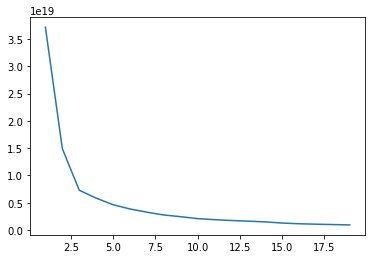

In [77]:
plt.plot([i for i in range(1,20)],[wcss[i-1] for i in range(1,20)])
plt.show()

In [78]:
clf=KMeans(n_clusters=5,init='k-means++',random_state=0)

In [79]:
clf.fit(df)

KMeans(n_clusters=5, random_state=0)

In [80]:
labels=clf.labels_

In [81]:
labels

array([3, 1, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 1, 4,
       2, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 1,
       1, 1, 1, 1, 3, 3, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 3, 3, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 3, 1, 1, 1, 1, 1, 3, 3, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       3, 3, 3, 0, 0, 0, 0, 3, 0, 0, 3, 1, 3, 1, 1, 1, 1, 3, 1, 1, 1, 1,
       3, 1, 3, 3, 1, 1, 3, 3, 3, 3, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 0,

## VALIDATION

[2, 4, 5, 9, 10, 15]
For n_clusters = 2 The average silhouette_score is : 0.7417467125529403
For n_clusters = 4 The average silhouette_score is : 0.6254438051504059
For n_clusters = 5 The average silhouette_score is : 0.6285318889812226
For n_clusters = 9 The average silhouette_score is : 0.5970896429203001
For n_clusters = 10 The average silhouette_score is : 0.5223464192174282
For n_clusters = 15 The average silhouette_score is : 0.43941009598772873


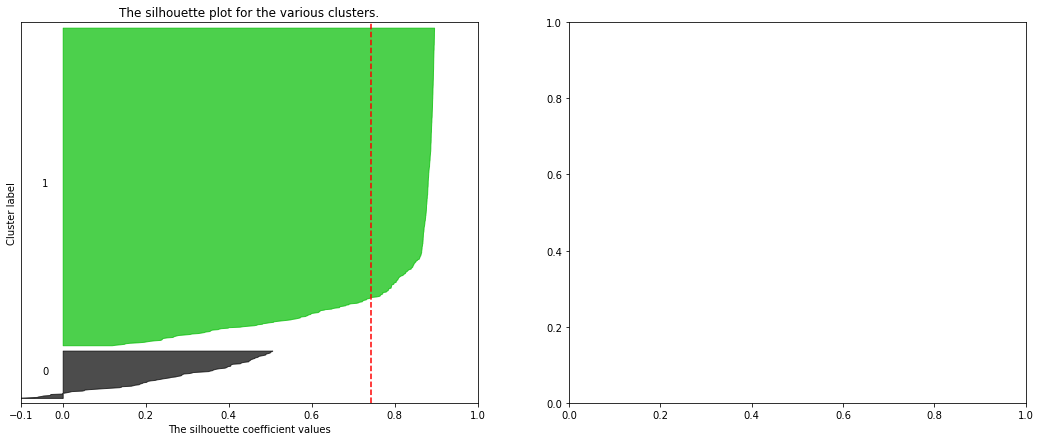

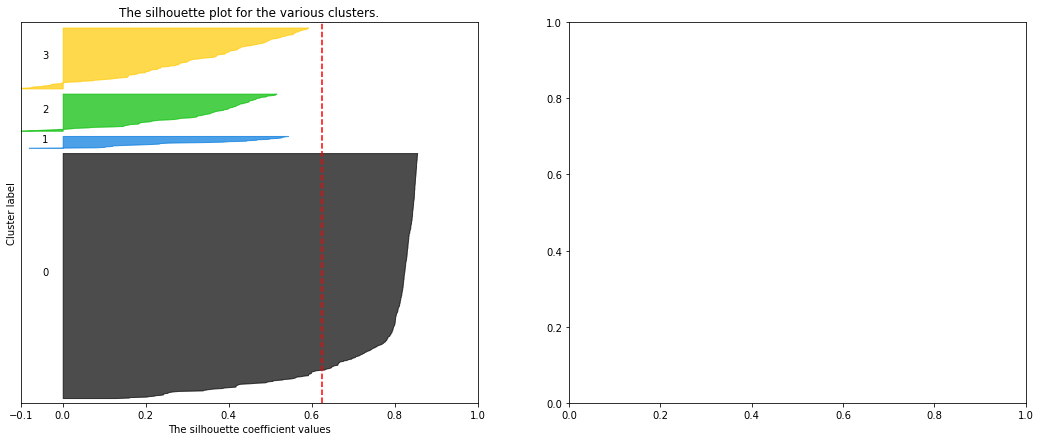

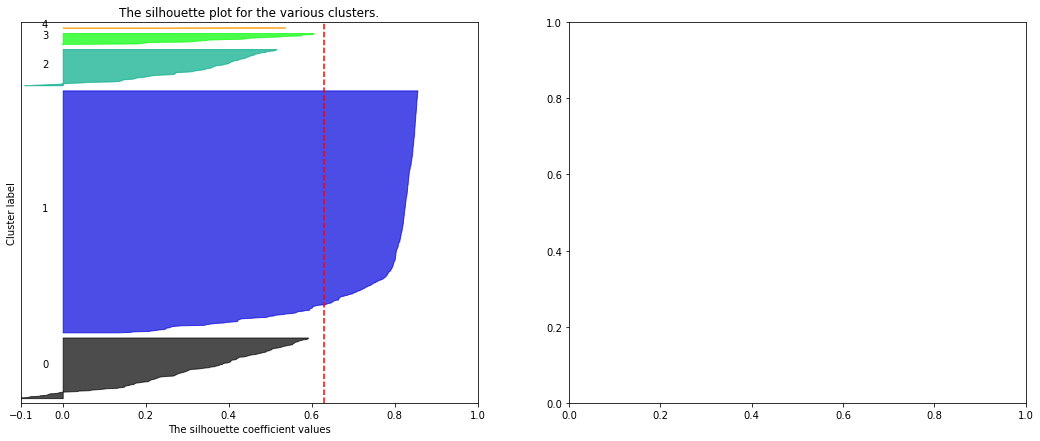

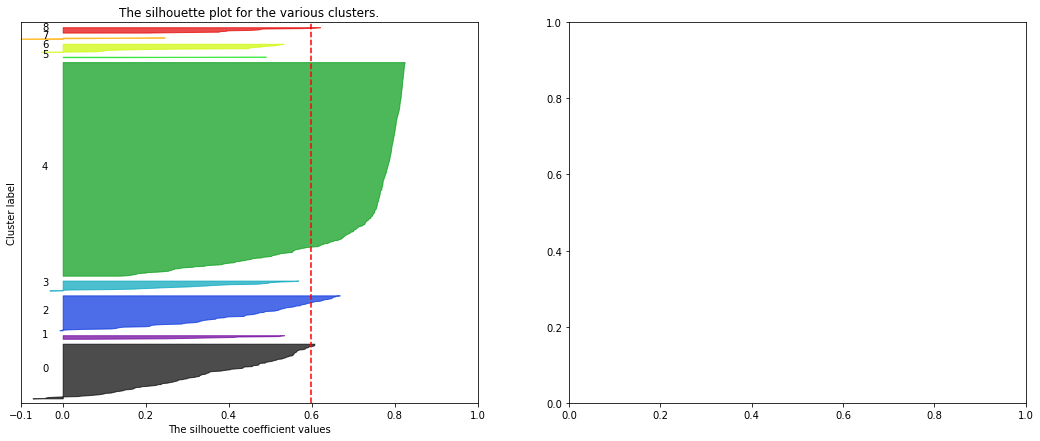

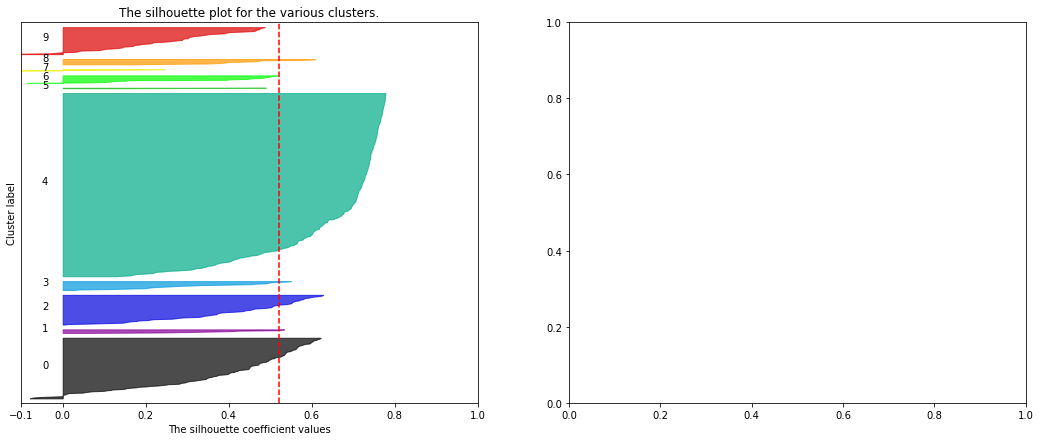

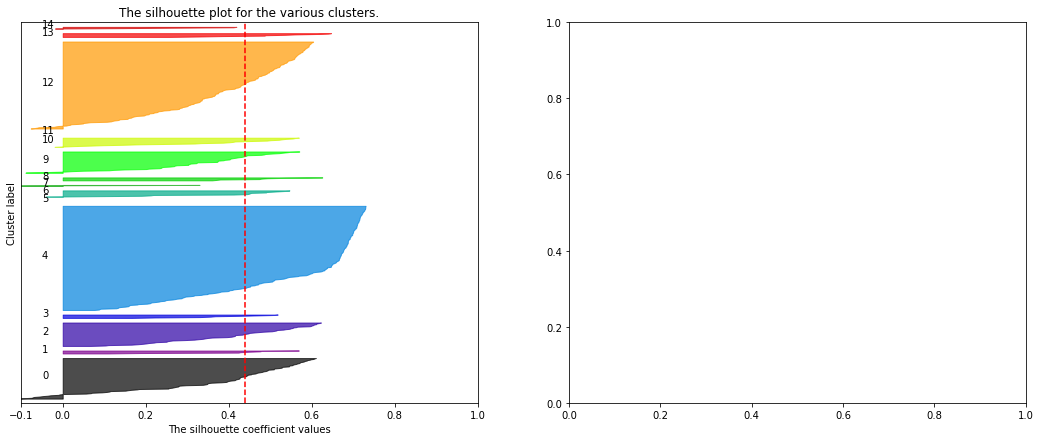

In [87]:
range_n_clusters=[2,4,5,9,10,15]
print(range_n_clusters)
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(df) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(df)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(df, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(df, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    '''
    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(df[:, 0], df[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()
  '''